# PART 1: SETTING UP

In [ ]:
!pip install tensorflow tensorflow-addons tensorflow-datasets

  Using cached tensorflow_addons-0.23.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (611 kB)
  Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)


In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


# PART 2: LOADING AND VISUALIZING IMAGES

In [ ]:
# Step 1: Upload the image to Colab
from google.colab import files
uploaded = files.upload()

Saving bini_sheena.jpg to bini_sheena (3).jpg


In [ ]:
# Step 2: Load the image using TensorFlow's load_img
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Assume only one file is uploaded, get the file name
image = list(uploaded.keys())[0]

# Load the image
img = load_img(image)

In [ ]:
# Step 3: Convert the loaded image to a NumPy array
img_array = img_to_array(img)

# PART 3: GREYSCALE CONVERSION

In [ ]:
# Greyscale
img_gray = tf.image.rgb_to_grayscale(img_array)

# PART 4: IMAGE RESIZING

In [ ]:
# Step 5: Resize the grayscale image
# Define new dimensions
new_width, new_height = 100, 100

# Resize the image
img_resized = tf.image.resize(img_gray, [new_height, new_width], method='bilinear')

# DISPLAY OF ALL IMAGES

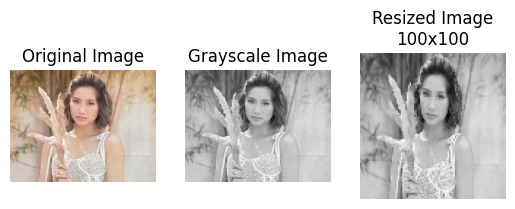

In [ ]:
# All three images
# Display the original image
plt.subplot(1, 3, 1)
plt.imshow(img_array.astype('uint8'))
plt.axis('off')
plt.title('Original Image')

# Display the grayscale image
plt.subplot(1, 3, 2)
plt.imshow(tf.squeeze(img_gray).numpy(), cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')

# Display the resized image
plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(img_resized).numpy(), cmap='gray')
plt.axis('off')
plt.title(f'Resized Image\n{new_width}x{new_height}')

plt.show()

# PART 5: CHALLENGE

# ROTATION

Text(0.5, 1.0, 'Rotated Image (90 degrees)')

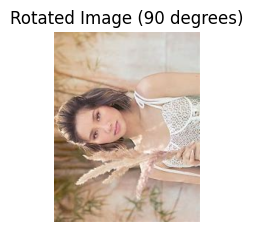

In [ ]:
tf.experimental.numpy.experimental_enable_numpy_behavior()

# Rotate the image by 90 degrees
img_rotated = tf.image.rot90(img_array, k=1)  # k=1 for 90 degrees clockwise rotation

# Display the rotated image
plt.subplot(1, 3, 1)
plt.imshow(img_rotated.astype('uint8'))
plt.axis('off')
plt.title('Rotated Image (90 degrees)')

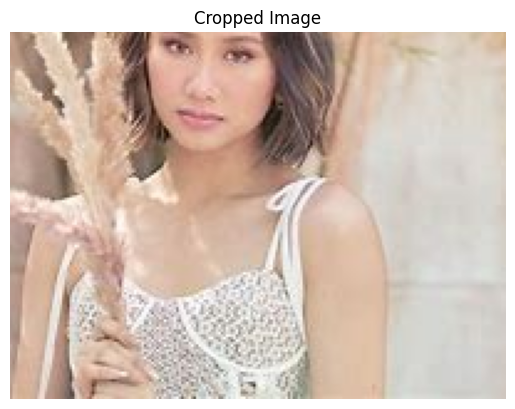

In [ ]:
import tensorflow as tf

# Get the height and width of the original image
height, width, _ = img_array.shape

# Define the coordinates of the bounding box
# top, left, height, width
crop_box = (50, 50, min(height - 50, 200), min(width - 50, 200))  # Adjusted crop region

# Crop the image
cropped_img = tf.image.crop_to_bounding_box(img_array, crop_box[0], crop_box[1], crop_box[2], crop_box[3])

# Display the cropped image
plt.imshow(cropped_img.numpy().astype('uint8'))
plt.axis('off')
plt.title('Cropped Image')
plt.show()

# COMBINATION

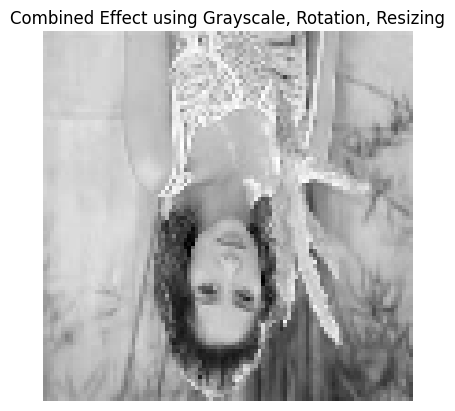

In [ ]:
# Convert to grayscale
img_gray = tf.image.rgb_to_grayscale(img_array)

# Rotate the grayscale image by 180 degrees
img_rotated_gray = tf.image.rot90(img_gray, k=2)  # k=2 for 180 degrees rotation

# Resize the rotated grayscale image
img_resized_gray = tf.image.resize(img_rotated_gray, [new_height, new_width], method='bilinear')

# Display the combined effect
plt.imshow(tf.squeeze(img_resized_gray).numpy(), cmap='gray')
plt.axis('off')
plt.title('Combined Effect using Grayscale, Rotation, Resizing')
plt.show()